In [1]:
import json
from collections import defaultdict

In [2]:
a = 'adidas, bmw, burger king, coca cola, esso, heineken, hp, mcdonalds, mercedes benz, nvidia, pepsi, shell, sri, starbucks, stella artois, target, texaco, toyota, twitter, ups'
logos = a.split(', ')

In [3]:
TRAIN, DEV, TEST = 'TRAIN', 'DEV', 'TEST'
files = { TRAIN: 'trainset.json', DEV: 'devset.json', TEST : 'testset.json'}

sets = defaultdict(list)

for t in [TRAIN, DEV, TEST]:
    print ('Load data from ' + files[t])
    with open(files[t], 'r') as fh:
        for line in fh.readlines():
            sets[t].append( json.loads(line) )

Load data from trainset.json
Load data from devset.json
Load data from testset.json


In [4]:
sets[DEV][0].keys()

dict_keys(['images', 'notes', 'shape_params', 'filename', 'states', 'decoration', 'side_length'])

In [5]:

SIDE_LENGTH = sets[DEV][0]['side_length']

In [6]:
for t in [TRAIN, DEV, TEST]:
    print ('Number of samples in ' + t + ' is ' + str(len(sets[t])))

Number of samples in TRAIN is 70
Number of samples in DEV is 10
Number of samples in TEST is 20


In [7]:
s = sets[DEV][0]['states'][0]

In [8]:
sets[DEV][0]['states'][1]

[[-0.899784, 0.1, -0.194339],
 [-0.001716, 0.1, -0.986708],
 [-0.062437, 0.1, -0.419449],
 [-0.656949, 0.1, -0.788469],
 [0.214662, 0.1, 0.92672],
 [-0.166667, 0.1, 0.333333],
 [-0.723438, 0.1, 0.247144],
 [0.635309, 0.1, -0.274163],
 [-0.361093, 0.1, -0.656966],
 [-0.515554, 0.1, 0.91973],
 [-0.390042, 0.1, 0.427794],
 [0.628212, 0.1, 0.245258],
 [-0.584956, 0.1, -0.031866],
 [0.585868, 0.1, 0.0162],
 [-0.6895, 0.1, 0.788071],
 [0.295405, 0.1, 0.090149],
 [0.700055, 0.1, 0.67225],
 [-0.044488, 0.1, -0.65464],
 [-0.065071, 0.1, 0.699818],
 [-0.058202, 0.1, 0.078393]]

In [9]:
sets[DEV][0]['notes'][0]['notes']

['Pick up block 6 and place it so it is on a diagonal between blocks 11 and 20',
 'slide block 6 left and down so that it is to the right of block 11 and above block 20',
 'move block 6 so that its bottom right corner is above block 20 and its top left corner is to the right of block 11',
 'The 6 block moved to behind the 20 from behind the 17 block.',
 'The 6th blocked was behind the 17 block, but moved next to the 11th block.',
 'The 6th block was behind the 17th block, but was moved on top of the 20th block.',
 "the number six cube should be taken from the upper right corner and placed between the 11 and 20 cubes.  The top of 6 should be level with the middle of the 11's right side, and level with the middle of the 20's top side.",
 'the number six should be placed so that the top left corner is even with the middle of the 11, and the lower right corner is even with the middle of the 20',
 'the 6 is placed to the right of the 11 and above the 20 so that it is right in the middle']

In [10]:
sets[DEV][0]

{'decoration': 'digit',
 'filename': '7_num0',
 'images': ['7_num0_00.png',
  '7_num0_01.png',
  '7_num0_02.png',
  '7_num0_03.png',
  '7_num0_04.png',
  '7_num0_05.png',
  '7_num0_06.png',
  '7_num0_07.png',
  '7_num0_08.png',
  '7_num0_09.png',
  '7_num0_10.png',
  '7_num0_11.png',
  '7_num0_12.png',
  '7_num0_13.png',
  '7_num0_14.png',
  '7_num0_15.png',
  '7_num0_16.png',
  '7_num0_17.png',
  '7_num0_18.png',
  '7_num0_19.png',
  '7_num0_20.png'],
 'notes': [{'finish': 1,
   'notes': ['Pick up block 6 and place it so it is on a diagonal between blocks 11 and 20',
    'slide block 6 left and down so that it is to the right of block 11 and above block 20',
    'move block 6 so that its bottom right corner is above block 20 and its top left corner is to the right of block 11',
    'The 6 block moved to behind the 20 from behind the 17 block.',
    'The 6th blocked was behind the 17 block, but moved next to the 11th block.',
    'The 6th block was behind the 17th block, but was moved 

In [11]:
import numpy as np
import matplotlib as mpl
import pylab as pl
from matplotlib import pyplot as plt
from matplotlib import animation
from matplotlib import collections as mc
import os, sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from simulator.utils import Cube2D, Transform2D

In [12]:
def visualize_state( s, decoration = 'logo', color = 'y', size = 10, colors = {}, texts = {} ) :
    """
    Visualize state s with decoration type, using color as default color for all blocks,
    
    Using colors for some special blocks, mapping from block index to a special color
    
    Using texts for text of some special blocks, otherwise use the index
    """
    fig, ax = plt.subplots()
    ax.set_xticks(np.arange(-2, 2, 0.1))
    ax.set_yticks(np.arange(-2, 2, 0.1))
    ax.set_xlim([-2, 2])
    ax.set_ylim([-2, 2])
    fig.set_size_inches(size, size)
    
    
    for i, position in enumerate(s):
        if i in texts:
            text = texts[i]
        else:
            if decoration == 'logo':
                text = logos[i]
            elif decoration == 'digit':
                text = str(i + 1)
        plt.text(position[0], position[2], text, fontsize=12, horizontalalignment='center', verticalalignment='center')
        c = Cube2D(transform = Transform2D(position = position[:1] + position[2:3], rotation = 0, scale = SIDE_LENGTH / 2) )
        
        
        if i in colors:
            co = colors[i]
        else:
            co = color
        lc = mc.PolyCollection([c.get_markers()], edgecolors = [co], facecolors = [co], linewidths=[2])
        ax.add_collection(lc)
    
    ax.autoscale()
    ax.margins(0.1)
    plt.show()

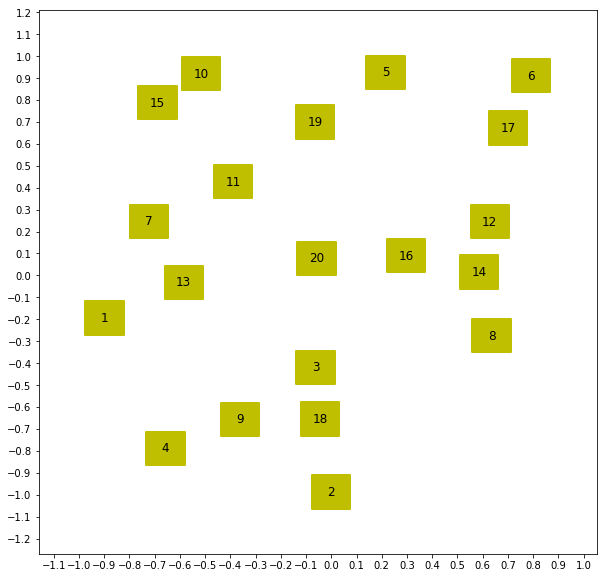

In [13]:
visualize_state(sets[DEV][0]['states'][0], decoration = 'digit')

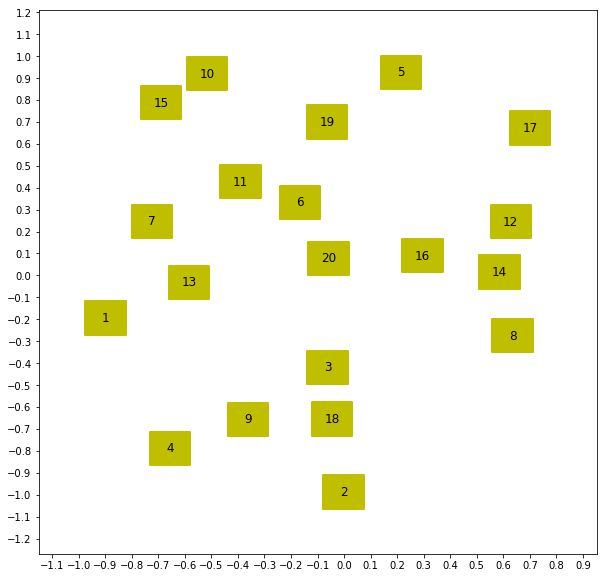

In [14]:
visualize_state(sets[DEV][0]['states'][1], decoration = 'digit')

In [15]:
sets[DEV][0]['notes'][0]['notes']

['Pick up block 6 and place it so it is on a diagonal between blocks 11 and 20',
 'slide block 6 left and down so that it is to the right of block 11 and above block 20',
 'move block 6 so that its bottom right corner is above block 20 and its top left corner is to the right of block 11',
 'The 6 block moved to behind the 20 from behind the 17 block.',
 'The 6th blocked was behind the 17 block, but moved next to the 11th block.',
 'The 6th block was behind the 17th block, but was moved on top of the 20th block.',
 "the number six cube should be taken from the upper right corner and placed between the 11 and 20 cubes.  The top of 6 should be level with the middle of the 11's right side, and level with the middle of the 20's top side.",
 'the number six should be placed so that the top left corner is even with the middle of the 11, and the lower right corner is even with the middle of the 20',
 'the 6 is placed to the right of the 11 and above the 20 so that it is right in the middle']

In [16]:
sets[DEV][1]['notes'][0]['notes']

['Move the Heineken block directly left of the SRI block.',
 'Move the Heineken block directly below the Esso block.',
 'Place the Heineken block adjacent to both the Esso and SRI blocks.',
 'PLACE THE HEINEKEN BLOCK DIRECTLY UNDER THE ESSO BLOCK.',
 'THE ESSO BLOCK NEEDS TO BE PUT DIRECTLY ABOVE THE HEINEKEN BLOCK WITHOUT MOVING ESSO.',
 'PLACE THE HEINEKEN TILE TO THE LEFT OF THE SRI BLOCK.',
 'Put the Heineken block so its right upper corner touches the lower left corner of the Shell block.',
 'Put the Heineken block so its right side completely touches the left side of the SRI block.',
 'Put the Heineken block so its upper edge completely touches the lower edge of the Esso block.  \uf057']

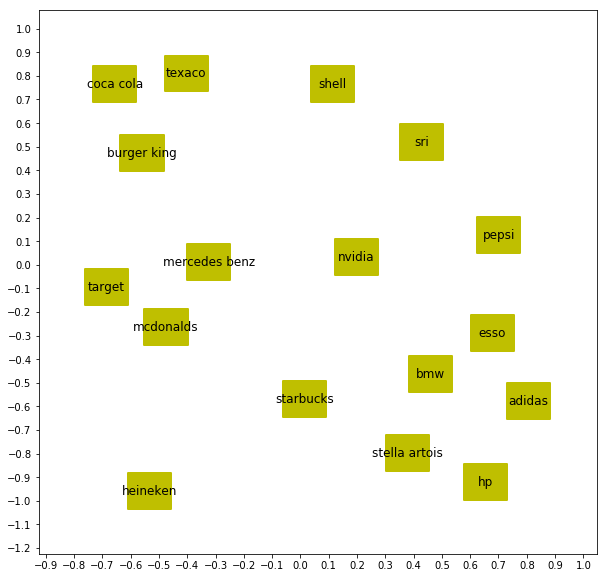

In [17]:
visualize_state(sets[DEV][1]['states'][0], decoration = 'logo')

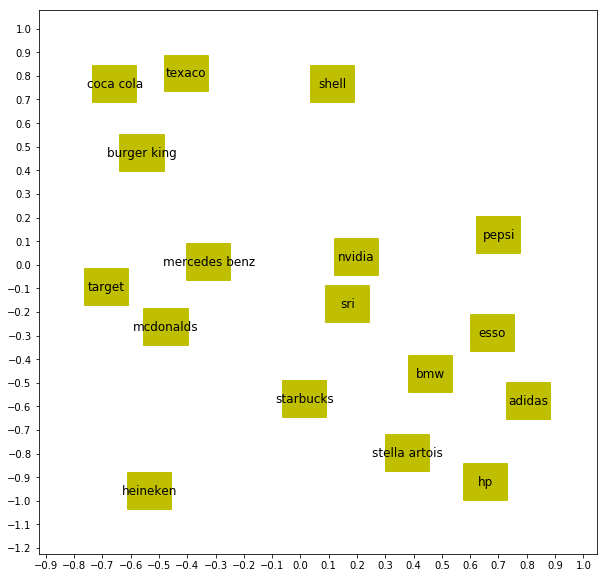

In [18]:
visualize_state(sets[DEV][1]['states'][1], decoration = 'logo')

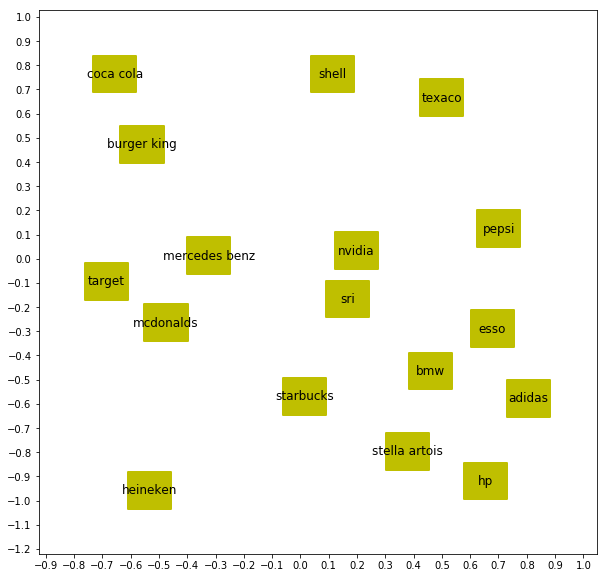

In [19]:
visualize_state(sets[DEV][1]['states'][2], decoration = 'logo')

In [20]:
sets[DEV][1]['notes'][1]['notes']

['Move the Adidas block directly diagonally left and below the Heineken block.',
 'Move the Adidas block directly southwest of the Heineken block.',
 'Place the Adidas block in the column between the columns that contain the Mercedes and Esso blocks, but two block spaces below either.',
 'PLACE THE ADIDAS BLOCK BELOW, DIAGONALLY, AND TO THE LEFT OF THE HEINEKEN TILE.',
 'THE HEINEKEN TILE SHOULD BE ABOVE, DIAGONALLY, AND TO THE RIGHT OF THE ADIDAS TILE AND NOT MOVE.',
 'THE ADIDAS TILE SHOULD BE DIRECTLY BELOW AND LEFT THE HEINEKEN TILE.',
 'Move the Adidas block so that the upper right corner touches the lower left corner of the Heineken block.',
 'Slide the Adidas block 6 blocks to the left. Slide it up until its upper right corner touches the lower left corner of the Heineken block.',
 'Slide the Adidas block 2 blocks straight up. Then slide it 6 block spaces to the left.']

In [21]:
for sample in sets[DEV]:
    print (sample['decoration'])

digit
logo
digit
digit
logo
digit
logo
logo
digit
logo


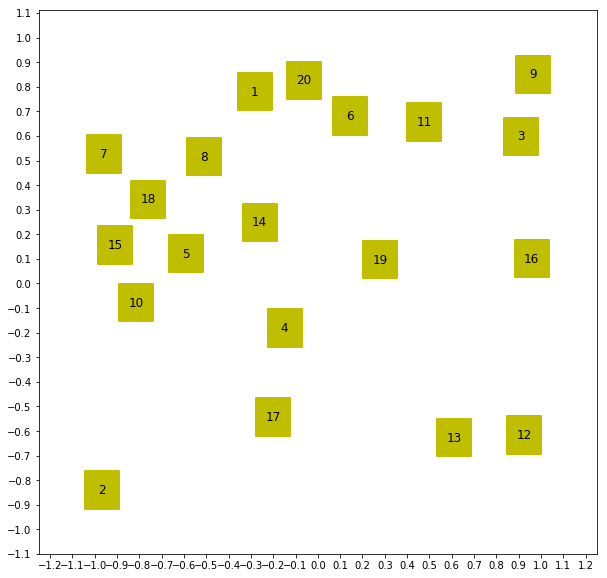

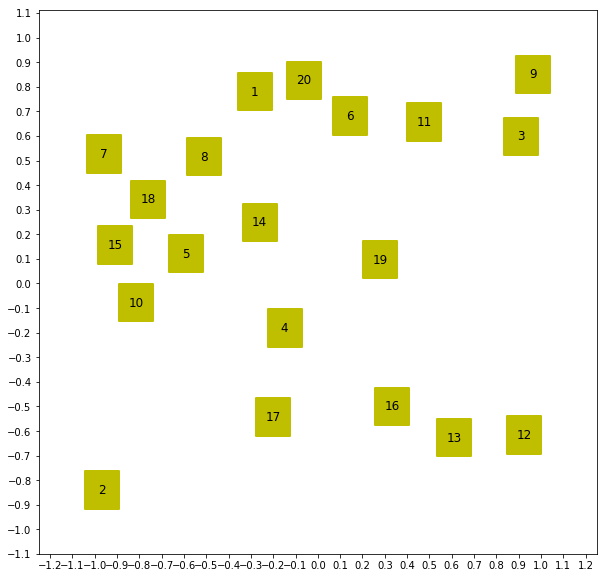

In [22]:
visualize_state(sets[DEV][2]['states'][0], decoration = 'digit')
visualize_state(sets[DEV][2]['states'][1], decoration = 'digit')

In [23]:
def debug( sample_index, step_index, datatype = TRAIN ):
    sample = sets[datatype][sample_index]
    
    for i in range(len(sample['notes'])):
        if sample['notes'][i]['start'] == step_index and sample['notes'][i]['finish'] == step_index + 1:
            for note in sample['notes'][i]['notes']:
                print (note)
    
    
        
    decoration = sample['decoration']
    
    prev_state = sample['states'][step_index]
    cur_state = sample['states'][step_index + 1]
    
    colors = {}
    add_at_the_end = []
    for i in range(len(prev_state)):
        prev_block = prev_state[i]
        cur_block = cur_state[i]
        
        if not all(np.isclose(prev_block, cur_block)):
            colors[i] = 'g'
            add_at_the_end.append((i, cur_block))
        
    merge_state = list(prev_state)
    
    texts = {}
    for i, cur_block in add_at_the_end:
        colors[len(merge_state)] = 'r'
        if decoration == 'logo':
            texts[len(merge_state)] = logos[i]
        else:
            texts[len(merge_state)] = str(i + 1)
        merge_state.append(cur_block)
        
    visualize_state(merge_state, decoration = decoration, colors= colors, texts = texts)

Pick up block 6 and place it so it is on a diagonal between blocks 11 and 20
slide block 6 left and down so that it is to the right of block 11 and above block 20
move block 6 so that its bottom right corner is above block 20 and its top left corner is to the right of block 11
The 6 block moved to behind the 20 from behind the 17 block.
The 6th blocked was behind the 17 block, but moved next to the 11th block.
The 6th block was behind the 17th block, but was moved on top of the 20th block.
the number six cube should be taken from the upper right corner and placed between the 11 and 20 cubes.  The top of 6 should be level with the middle of the 11's right side, and level with the middle of the 20's top side.
the number six should be placed so that the top left corner is even with the middle of the 11, and the lower right corner is even with the middle of the 20
the 6 is placed to the right of the 11 and above the 20 so that it is right in the middle


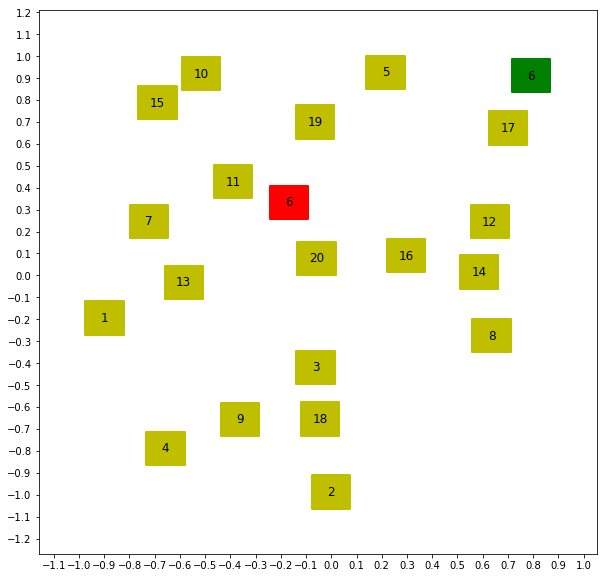

In [24]:
debug(0, 0, DEV)

move the SRI block below the NVIDIA block. The SRI block should be sticking out 1/8 of the lenghth of the NVIDIA block to the left.
place the sri block on the same row as the target block. place the sri block below the nividia block
move the sri block south to below the nvidia block. move the sri block 1/2 a block length left
slide the SRI box down so it is in front of the NVIDIA box then slide it over so that the i in SRI lines up with the second I in NVIDIA
place the SRI block so it's left side is aligned with the right side of the Starbucks block in a vertical line  and it's bottom is aligned with the top of the Esso block in a horizontal line
place the SRI block so that it aligns with the bottom of the Mercedes benz block horizontally and the right side of the starbucks block vertically
Move SRI directly below NVIDIA and just slightly to the left.
Move SRI diagonally down to the left until it is below barely to the left of NVIDIA.
Move SRI down three spots then over two to the left

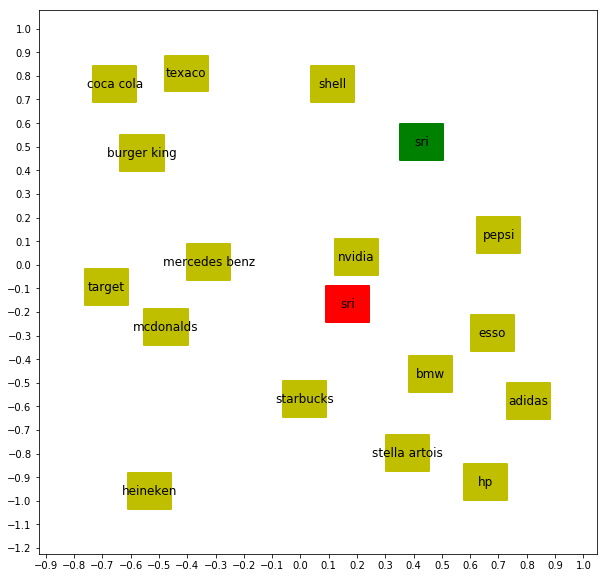

In [25]:
debug(1, 0, DEV)

Slide 16 down and to the left until it is slightly above and left of 13.
Move block 16 down under block 19, but slightly above 13.
Block 16 should be slid down to the left until it's left edge is overlapping 19 and bottom is overlapping 17.
Move block 16 half a row above block 17, and half a column to the right of block 19.
Place block 16 half a column to the left of block 11, and half a row above block 17.
Put block 16 almost a full row above block 13, and halfway between blocks 11 and 19 horizontally.
Move the 16 down and to the left until it is even with the 17 box and is sitting above the 13.
Slide the 16 box left of 13, then up so that it is even with the 17 box.
Slide the 16 box down to the 12 box, then left until there is about a half a box distance between the left edge of the 13 box and the right edge of the 16 box.


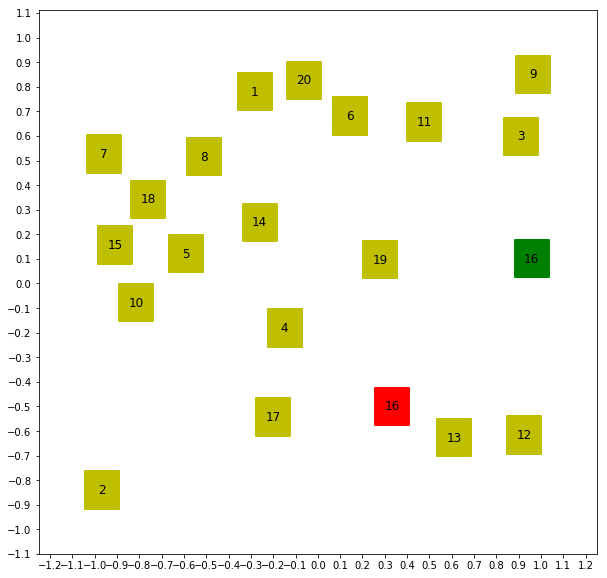

In [26]:
debug(2, 0, DEV)

Slide 17 over to the right until it's directly under and touching 16.
Move block 17 over under block 16 until it is touching it.
Block 17 should be moved under block 16 and beside block 13.
Move block 17 directly below block 16.
Put block 17 south of block 16.
Put block 17 in the first open space below block 16.
Move the 17 box directly and even with the 16 box.
Slide the 17 box down and to the right so that it is directly below and touching the 16 box.
Pick up the 17 box. Sit it down directly and evenly with and below the 16 box.


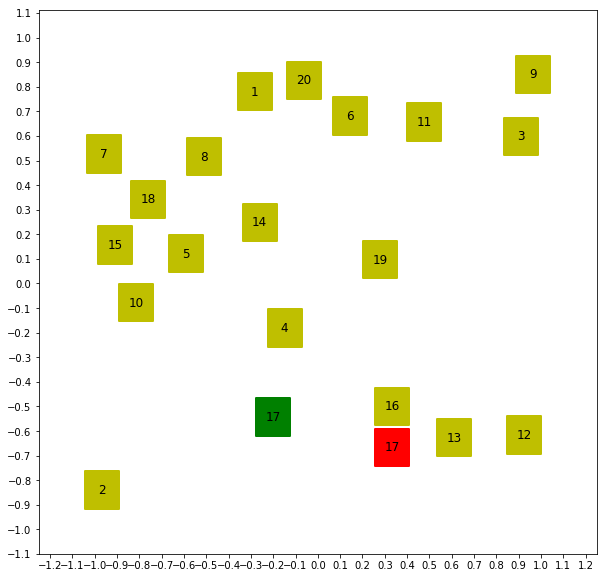

In [27]:
debug(2, 1, DEV)

Move the 13 block up in line with the four block. Leave a block space between the 4 block and the 13 block. There should be an empty space between the 13 and 2 also with the 2 block just beneath the 13 block.
13 block, between the 2 and 4 block. Inline with the 4.
13, in line with 4 with one space between them.
Move block 13 to the same row as block 4, horizontally equidistant from blocks 4 and 2.
Place block 13 horizontally equidistant from blocks 2 and 4, and on the same horizontal plane as block 4.
Put block 13 in the column to the right of block 14, and on the same row as block 4.
Move block 13 between blocks 4 and 2, centered between them, and slightly higher than block 4.
Move block 13 to the right of block 4, touching 4 and positioned slightly higher, then slide 13 half the distance to block 2.
Move block 13 to the left of block 2, then move it half the distance to block 4, then slide it up until it's slightly higher than block 4.


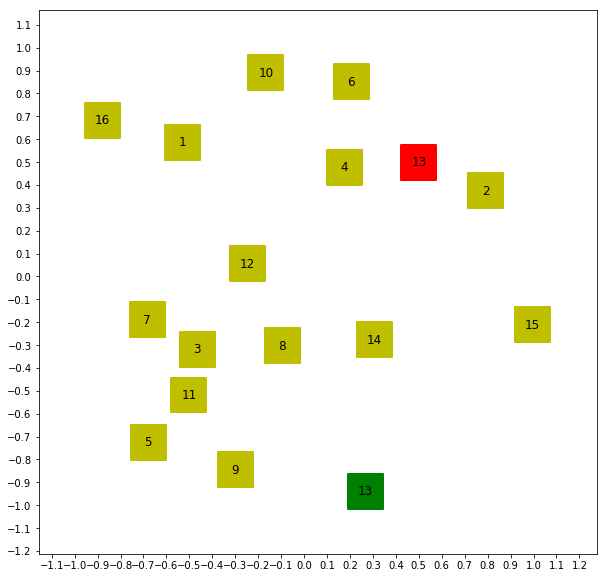

In [28]:
debug(3, 0, DEV)

Move the Adidas block diagonally above and to the left of the Burger King block.
Place the Adidas block directly northwest of the BMW block.
Put the Adidas block on the same row as the Texaco block, to the left and with six intervening empty block spaces.
Move the Adidas box so that it is to the left of the Texaco box with its bottom right corner near the top left corner of the BMW box.
Slide the Adidas box to the left until it will clear the BMW box. Then slide it up until its bottom right corner is near the top left corner of the BMW box and lined up with the Texaco box to the right.
Pick up the Adidas box and place it so that it's bottom right corner is near the top left corner of the BMW box with it lining up with the Texaco box to the right.
Adidas is placed directly above and to the left of BMW
Adidas is placed to that its lower right corner is touching the upper left corner of BMW
Adidas lines up on the left side of Texaco, just to the left of BMW


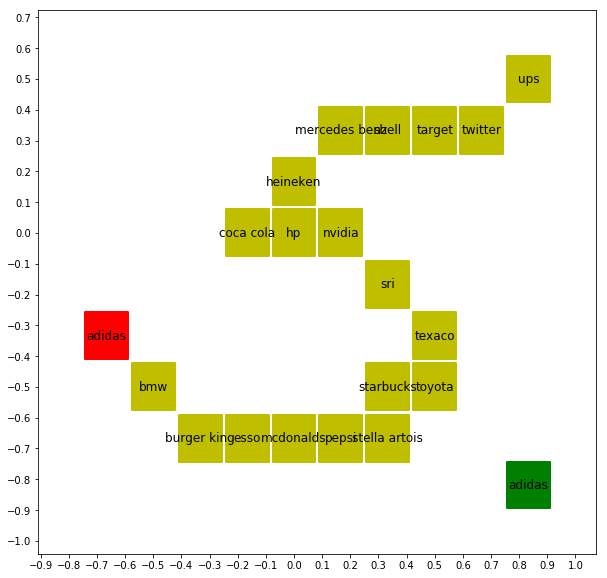

In [29]:
debug(6, 19, DEV)

Move the UPS block beneath the Starbucks block but leave about a half a block width between Starbucks and UPS
Leaving space between them, UPS beneath Starbucks.
Line UPS up beneath Starbucks.
Move the UPS block below the Starbucks block, with half an empty block space in between.
Place the UPS block south of the Starbucks block, with half an empty block space in between.
Put the UPS block in the same vertical column as the Starbucks block, and the same horizontal row as the Heineken block.
Take the UPS block and put it right underneath the Starbucks block.
Take the UPS block and place it below the Starbucks block.
Place the UPS block under the Starbucks block.


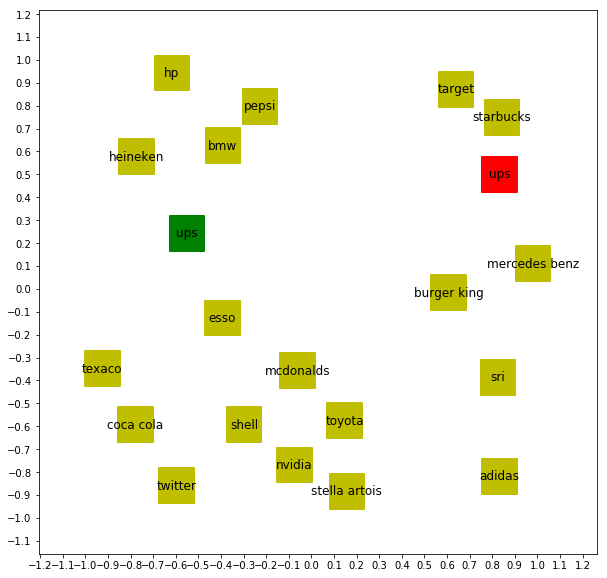

In [30]:
debug(6, 0, DEV)

In [ ]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
print (STOP_WORDS)
## Download successful
## But needs to use full name
nlp = spacy.load('en_core_web_sm')

In [203]:
logo_to_index = dict((value, key) for key, value in enumerate(logos))
logo_to_index['mcdonald']= 7
logo_to_index['starbuck']= 13

logo_to_index['burger']= 2
logo_to_index['king']= 2
logo_to_index['burger-king']= 2

logo_to_index['coca']= 3
logo_to_index['cola']= 3
logo_to_index['coca-cola']= 3

logo_to_index['mercedes']= 8
logo_to_index['benz']= 8
logo_to_index['mercedes-benz']= 8
logo_to_index['mercedez']= 8

logo_to_index['stella']= 14
logo_to_index['artois']= 14
logo_to_index['stella-artois']= 14

stopwords = ['to', 'the', 'but', 'a', 'and', 'block', 'there', 'should', 'be', 'coca', 'cola', 'mercedes', 'benz', 'burker', 'king', 'stella', 'artois']

digits = dict((str(k),k) for k in range(21))
for i, word in enumerate(['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten', 'eleven', 'twelve', 'thirteen', 'fourteen', 'fifteen', 'sixteen', 'seventeen', 'eighteen', 'nineteen']):
    digits[word] = i
for i, word in enumerate(['zero', 'first', 'second', 'third', 'fourth', 'fifth', 'sixth', 'seventh', 'eighth', 'nineth', 'tenth', 'eleventh', 'twelveth', 'thirteenth', 'fourteenth', 'fifteenth', 'sixteenth', 'seventeenth', 'eighteenth', 'nineteenth']):
    digits[word] = i
for k in range(21):
    digits[str(k)+'th'] = k

In [204]:
logo_to_index

{'adidas': 0,
 'artois': 14,
 'benz': 8,
 'bmw': 1,
 'burger': 2,
 'burger king': 2,
 'burger-king': 2,
 'coca': 3,
 'coca cola': 3,
 'coca-cola': 3,
 'cola': 3,
 'esso': 4,
 'heineken': 5,
 'hp': 6,
 'king': 2,
 'mcdonald': 7,
 'mcdonalds': 7,
 'mercedes': 8,
 'mercedes benz': 8,
 'mercedes-benz': 8,
 'mercedez': 8,
 'nvidia': 9,
 'pepsi': 10,
 'shell': 11,
 'sri': 12,
 'starbuck': 13,
 'starbucks': 13,
 'stella': 14,
 'stella artois': 14,
 'stella-artois': 14,
 'target': 15,
 'texaco': 16,
 'toyota': 17,
 'twitter': 18,
 'ups': 19}

In [168]:
import re
def find_objects( instruction , decoration):
    """
    The easiest approach would be to get the first object out of multiple objects as the moving object
    and all the remaining objects to be thematic objects for location that the moving object needs to move to
    
    Examples:
    instruction = Move the UPS block beneath the Starbucks block but leave about a half a block width between Starbucks and UPS
    -> object = index[UPS], locative_objects = [index[Starbucks]]
    
    instruction = Slide 16 down and to the left until it is slightly above and left of 13.
    -> object = 15, locative_objects = [12]
    
    text_form is a string form after we have remove the object and replace locative_objects with 
    
    Parameters:
    ------------
    instruction: an instruction in a string form
    decoration: = 'logo' or 'digit'
    
    Returns:
    ------------
    object: index - int
    locative_objects: indices - list(int)
    text_form - list(string)
    """
    instruction_words = re.split(';|,|\s|\.|\'',instruction.lower())
    
    obj = None
    locative_objects = []
    text_form = []
    
    if decoration == 'logo':
        for word in instruction_words:
            if word in logo_to_index:
                if obj is None or logo_to_index[word] == obj:
                    obj = logo_to_index[word]
                else:
                    if logo_to_index[word] not in locative_objects:
                        locative_objects.append(logo_to_index[word])
                        
                    for i, locative_object in enumerate(locative_objects):
                        if locative_object == logo_to_index[word]:
                            text_form.append('BLOCK-'+ str(i))
            else:
                text_form.append(word)
    
    if decoration == 'digit':
        for word in instruction_words:
            if word in digits:
                if obj is None or digits[word] - 1 == obj:
                    obj = digits[word] - 1
                else:
                    if digits[word] - 1 not in locative_objects:
                        locative_objects.append(digits[word] - 1)
                    
                    for i, locative_object in enumerate(locative_objects):
                        if locative_object == digits[word] - 1:
                            text_form.append('BLOCK-'+ str(i))
            else:
                text_form.append(word)
    
    text_form = [word for word in text_form if word not in stopwords and word != '']
    
    return obj, locative_objects, text_form

In [169]:
find_objects( 'Move the UPS block beneath the Starbucks block but leave about a half a block width between Starbucks and UPS' , 'logo')

(19,
 [13],
 ['move',
  'beneath',
  'BLOCK-0',
  'leave',
  'about',
  'half',
  'width',
  'between',
  'BLOCK-0'])

In [154]:
find_objects( 'Leaving space between them, UPS beneath Starbucks.' , 'logo')

(19, [13], ['leaving', 'space', 'between', 'them', 'beneath', 'BLOCK-0'])

In [155]:
find_objects( 'Move the 13 block up in line with the four block. Leave a block space between the 4 block and the 13 block. There should be an empty space between the 13 and 2 also with the 2 block just beneath the 13 block.', 'digit')

(12,
 [3, 1],
 ['move',
  'up',
  'in',
  'line',
  'with',
  'BLOCK-0',
  'leave',
  'space',
  'between',
  'BLOCK-0',
  'an',
  'empty',
  'space',
  'between',
  'BLOCK-1',
  'also',
  'with',
  'BLOCK-1',
  'just',
  'beneath'])

In [217]:
def process (note):
    if ', place ' in note:
        parts = note.split(', place ')
        note = parts[1] + ' ' + parts[0]
        
    note = note.replace('"', '')
                    
    return note

def test_find_objects( find_objects , sample_index, step_index, datatype = TRAIN, verbose = 0) :
    """
    Test for a sample in the dataset, if the object and locative_objects in find_objects are
    correct objects
    
    
    Parameters:
    ------------
    find_objects: a object finding function that follow the previous type signatures
    sample_index:
    step_index:
    datatype:
    """
    sample = sets[datatype][sample_index]
    decoration = sample['decoration']
    
    prev_state = sample['states'][step_index]
    cur_state = sample['states'][step_index + 1]
    
    for i in range(len(prev_state)):
        prev_block = prev_state[i]
        cur_block = cur_state[i]
        
        if not all(np.isclose(prev_block, cur_block)):
            obj = i
    
    distances = []
    for i in range(len(cur_state)):
        cur_block = cur_state[i]
        
        distances.append( (i,  np.linalg.norm( np.array(cur_block) - np.array(cur_state[obj] )) ))
        
    distances = sorted(distances, key = lambda l : l[1])
    
    no_of_notes = 0
    no_of_correct_notes = 0
    
    for i in range(len(sample['notes'])):
        if sample['notes'][i]['start'] == step_index and sample['notes'][i]['finish'] == step_index + 1:
            
            for note in sample['notes'][i]['notes']:
                # Handle a special case
                note = process(note)
                                no_of_notes += 1
                cand_obj, locative_objects, text_form = find_objects(note, decoration)
                

                if verbose == 0:
                    if obj != cand_obj:
                        print ('sample_index = %s; step_index = %s' % (sample_index, step_index) )
                        print (note)
                        print ("Object = %s, object from note = %s, locative_objects = %s" % (obj, cand_obj, str(locative_objects)))
                        
                
                if verbose == 1:
                    print (note)
                    print ("Object = %s, object from note = %s, locative_objects = %s" % (obj, cand_obj, str(locative_objects)))
                    
                if obj == cand_obj:
                    no_of_correct_notes += 1
                
    return (no_of_notes, no_of_correct_notes)
    

In [179]:
test_find_objects(find_objects, 4, 0, DEV, verbose = 0)

(9, 9)

In [183]:
def test_find_objects_one_set( find_objects , datatype = TRAIN) :
    no_of_all_notes = 0
    no_of_all_correct_notes = 0
    
    for sample_index in range(len(sets[datatype])):
        sample = sets[datatype][sample_index]
        for step_index in range(len(sample['states']) - 1):
            no_of_notes, no_of_correct_notes = test_find_objects(find_objects, sample_index, step_index, datatype, verbose = 0)
    
            no_of_all_notes += no_of_notes
            no_of_all_correct_notes += no_of_correct_notes
    
    return (no_of_all_notes, no_of_all_correct_notes)

In [218]:
no_of_all_notes, no_of_all_correct_notes = test_find_objects_one_set(find_objects, datatype = DEV)

sample_index = 0; step_index = 6
The 16 and 17 block moved down a little but switched places.
Object = 16, object from note = 15, locative_objects = [16]
sample_index = 0; step_index = 6
The 16 was under the 17 but switched places and now they are ontop of eachother.
Object = 16, object from note = 15, locative_objects = [16]
sample_index = 0; step_index = 6
The 16th block is under the 17th block, but there is a gap in the distance that they share, but they are later mashed together but switch places.
Object = 16, object from note = 15, locative_objects = [16]
sample_index = 0; step_index = 10
Continue the diagonal row of 20 and 19 downward with 15
Object = 14, object from note = 19, locative_objects = [18, 14]
sample_index = 0; step_index = 11
Continue the diagonal row of 20, 19 and 15 downward with 13.
Object = 12, object from note = 19, locative_objects = [18, 14, 12]
sample_index = 1; step_index = 9
THE ESSO BLOCK NEEDS TO BE PUT DIRECTLY ABOVE THE HEINEKEN BLOCK WITHOUT MOVING ESS

In [223]:
print ('No of notes = %d, no of correct notes = %d, percentage of correct = %.4f%%' % (no_of_all_notes, no_of_all_correct_notes, no_of_all_correct_notes / no_of_all_notes ) )

No of notes = 1719, no of correct notes = 1685, percentage of correct = 0.9802%


In [224]:
no_of_all_notes, no_of_all_correct_notes = test_find_objects_one_set(find_objects, datatype = TRAIN)

sample_index = 0; step_index = 12
Move block number 5 so that it is 5 spaces above block number 8, in a straight line.
Object = 6, object from note = 4, locative_objects = [7]
sample_index = 1; step_index = 2
Put the number before 15 above it.
Object = 13, object from note = 14, locative_objects = []
sample_index = 1; step_index = 3
Begin a right upward diagonal from 14 with 18.
Object = 17, object from note = 13, locative_objects = [17]
sample_index = 1; step_index = 4
Put the number before 18 above it.
Object = 16, object from note = 17, locative_objects = []
sample_index = 1; step_index = 5
Continue that movement by placing the number before the one you just placed above it.
Object = 15, object from note = 0, locative_objects = []
sample_index = 1; step_index = 7
Begin a left downward diagonal from 13 with 9.
Object = 8, object from note = 12, locative_objects = [8]
sample_index = 2; step_index = 4
Move the McDonald’s box so that it is lined up directly to the right of the Heineken 

Continue the diagonal line made with the HP and Mercedes logos by putting the Esso logo up and to the left of the HP logo.
Object = 4, object from note = 6, locative_objects = [8, 4]
sample_index = 23; step_index = 0
Place block 17 in the same column as block 17, and a row below block 5.
Object = 2, object from note = 16, locative_objects = [4]
sample_index = 23; step_index = 2
In the diagonal line going up and right and starting 3,5, add the next odd number.
Object = 6, object from note = 2, locative_objects = [4]
sample_index = 23; step_index = 3
In the diagonal line going up and right and starting 3,5,7, add the next odd number.
Object = 8, object from note = 2, locative_objects = [4, 6]
sample_index = 23; step_index = 4
Put the next odd number directly right of 9.
Object = 10, object from note = 8, locative_objects = []
sample_index = 23; step_index = 5
Put the next odd number diagonally adjacent (down and right) to 11.
Object = 12, object from note = 10, locative_objects = []
samp

Move the Coke block until it is exactly four spaces above the Esso block
Object = 3, object from note = 4, locative_objects = []
sample_index = 51; step_index = 13
Move the coke block so that it's right hand side is directly touching the HP block's left hand side.
Object = 3, object from note = 6, locative_objects = []
sample_index = 51; step_index = 16
Put the block in the near right corner directly left of the farthest, leftmost block on the board.
Object = 0, object from note = None, locative_objects = []
sample_index = 52; step_index = 3
move essp block to the right of the adidas block.
Object = 4, object from note = 0, locative_objects = []
sample_index = 53; step_index = 6
Continue the diagonal line formed by blocks 10 and 13 with block 17.
Object = 16, object from note = 9, locative_objects = [12, 16]
sample_index = 54; step_index = 8
Put the Pepsi block in the same column as the Esso block, below and with two intervening empty block spaces in between.
Object = 5, object from no

put SREi box to the direct east of the pepsi box
Object = 12, object from note = 10, locative_objects = []
sample_index = 63; step_index = 8
Slide cube exatly below Toyota cube
Object = 18, object from note = 17, locative_objects = []
sample_index = 64; step_index = 0
Put the nighest number on the board half a square from the right edge and three squares back from the front edge.
Object = 19, object from note = 2, locative_objects = []
sample_index = 64; step_index = 1
Place block 20 west of block 20.
Object = 18, object from note = 19, locative_objects = []
sample_index = 64; step_index = 1
Put the next highest number just left of 20.
Object = 18, object from note = 19, locative_objects = []
sample_index = 64; step_index = 1
Subtract 1 from 20. Put that number so 20 is just to its right.
Object = 18, object from note = 0, locative_objects = [19]
sample_index = 64; step_index = 2
Put the next highest multiple of 5 just left of 19.
Object = 14, object from note = 4, locative_objects = [

In [225]:
print ('No of notes = %d, no of correct notes = %d, percentage of correct = %.4f%%' % (no_of_all_notes, no_of_all_correct_notes, no_of_all_correct_notes / no_of_all_notes ) )

No of notes = 11871, no of correct notes = 11603, percentage of correct = 0.9774%


Move block 7 to the left of block 12.
Place block 7 west of block 12.
Put block 7 in the first open space to the left of block 16.
Put block 7 on the surface directly to the left of block 12.
Put block 7 in the same column as block 8 and the same row as block 12.
Put block 7 on the surface directly above block 13. Then move it one block space to the left and two block spaces towards the top edge of the surface.
Take block number 7 and put it to the left of block number 12.
Put block number 7 beside block number 12 so that their sides are touching.
Move block number 5 so that it is 5 spaces above block number 8, in a straight line.


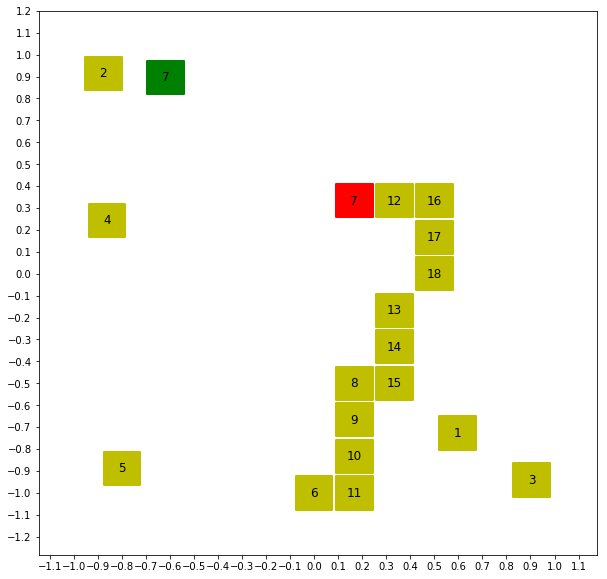

In [173]:
debug(0,12)

In [226]:
from keras.layers import Input

Using TensorFlow backend.


In [227]:
class DataSample(object):
    """
    To store data for each sample
    """
    def __init__(self, note, state, moving_obj, target, decoration) :
        """
        Parameters:
        ===========
        note: instruction
        state: list of objects locations in 2d
        moving_obj: correct moving index
        target: target location that the moving object will move to
        """
        self.note = note
        self.state = state
        self.moving_obj = moving_obj
        self.target = target
        self.decoration = decoration 
    
    def preprocess(self):
        """
        Preprocess help to select information from the note
        """
        instruction = process(self.note)
        self.cand_obj, self.locative_objects, self.text_form = find_objects( instruction , self.decoration )

In [240]:
def get_data_samples( datatype = TRAIN) :
    data = []
    
    for sample_index in range(len(sets[datatype])):
        sample = sets[datatype][sample_index]
        decoration = sample['decoration']
        
        for step_index in range(len(sample['states']) - 1):
            prev_state = sample['states'][step_index]
            cur_state = sample['states'][step_index + 1]

            for i in range(len(prev_state)):
                prev_block = prev_state[i]
                cur_block = cur_state[i]

                if not all(np.isclose(prev_block, cur_block)):
                    moving_obj = i
                    target = cur_block
            
            for i in range(len(sample['notes'])):
                if sample['notes'][i]['start'] == step_index and sample['notes'][i]['finish'] == step_index + 1:
                    for note in sample['notes'][i]['notes']:
                        ds = DataSample (note, np.array(prev_state)[:,[0,2]], moving_obj, np.array(target)[[0,2]], decoration)
                        data.append(ds)
    
    return data

In [241]:
all_data = {}
for datatype in [TRAIN, DEV, TEST]:
    all_data[datatype] = get_data_samples ( datatype )
    print ('Size of data samples for %s is %d' % (datatype, len(all_data[datatype])))

Size of data samples for TRAIN is 11871
Size of data samples for DEV is 1719
Size of data samples for TEST is 3177


In [243]:
for datatype in [TRAIN, DEV, TEST]:
    for sample in all_data[datatype]:
        sample.preprocess()

In [244]:
all_data[TRAIN][0].__dict__

{'cand_obj': 5,
 'decoration': 'digit',
 'locative_objects': [],
 'moving_obj': 5,
 'note': 'Move 6 so it is in the middle of the bottom edge of the table',
 'state': array([[ 0.595808, -0.727508],
        [-0.876783,  0.915448],
        [ 0.905291, -0.940973],
        [-0.861536,  0.242345],
        [-0.79869 , -0.889141],
        [ 0.899853,  0.858539],
        [-0.61712 ,  0.895679],
        [-0.288423, -0.354022],
        [-0.565733, -0.083259],
        [ 0.891467, -0.096576],
        [-0.316957,  0.677047],
        [-0.881561, -0.610627],
        [-0.042802, -0.726727],
        [ 0.832044,  0.409979],
        [ 0.514154,  0.037097],
        [-0.690019,  0.509998],
        [ 0.99517 , -0.658664],
        [ 0.54642 ,  0.268098]]),
 'target': array([ 0., -1.]),
 'text_form': ['move',
  'so',
  'it',
  'is',
  'in',
  'middle',
  'of',
  'bottom',
  'edge',
  'of',
  'table']}

In [248]:
all_text = []
max_len = -1
for sample in all_data[TRAIN]:
    s_text = ' '.join(sample.text_form).lower()
    if max_len < len(s_text):
        max_len = len(s_text)
    all_text.append( s_text )

raw_text = ' '.join(all_text)

chars = sorted(list(set(raw_text)))
char_to_int = dict((c, i) for i, c in enumerate(chars))

In [272]:
print (char_to_int)

{'q': 36, 'l': 31, 'f': 25, '\u200b': 46, 'd': 23, 'a': 20, '2': 10, 'g': 26, '!': 1, ' ': 0, 'c': 22, 'm': 32, 'o': 34, ':': 18, 'w': 42, '0': 8, 'y': 44, 'j': 29, '7': 15, '(': 4, '&': 3, '9': 17, 'n': 33, 'h': 27, 'r': 37, '/': 7, '%': 2, 'u': 40, '`': 19, 'z': 45, '-': 6, 's': 38, 'v': 41, ')': 5, '1': 9, '8': 16, '’': 47, 't': 39, '5': 13, 'b': 21, 'p': 35, '6': 14, 'x': 43, 'i': 28, '3': 11, '4': 12, 'e': 24, 'k': 30}


In [249]:
n_chars = len(raw_text)
n_vocab = len(chars)
print("Total Characters: ", n_chars)
print("Total Vocab: ", n_vocab)
print("Max sequence len = ", max_len)

Total Characters:  596040
Total Vocab:  48
Max sequence len =  311


In [256]:
from keras.layers import Lambda, Multiply, Add
from keras.models import Model
from keras.layers import LSTM, Dense, Dropout

In [262]:
def crop(dimension, start, end):
    # Crops (or slices) a Tensor on a given dimension from start to end
    # example : to crop tensor x[:, :, 5:10]
    # call slice(2, 5, 10) as you want to crop on the second dimension
    def func(x):
        if dimension == 0:
            return x[start: end]
        if dimension == 1:
            return x[:, start: end]
        if dimension == 2:
            return x[:, :, start: end]
        if dimension == 3:
            return x[:, :, :, start: end]
        if dimension == 4:
            return x[:, :, :, :, start: end]
    return Lambda(func)

"""
Model 1:
We only select the first target to predict
"""
sequence_length = 320
Note = Input(shape=(sequence_length, n_vocab))
y = LSTM(100, input_shape = (sequence_length, n_vocab), return_sequences = True ) (Note)
y = Dropout(0.2) (y)
y = LSTM(100) (y)
y = Dropout(0.2) (y)
# Two weights, two bias
# If coordinates of input is (X1, X2), and this layer is (Y1, Y2, Y3, Y4)
# Result would be 
y1 = Dense(2, activation = 'linear') (y)
y2 = Dense(2, activation = 'linear') (y)
Coordinates = Input(shape= (2, ))
c1 = Multiply()([y1, Coordinates])
c = Add()([y2, c1])
m1 = Model(inputs = [Note, Coordinates], outputs = c)

In [261]:
print (m1.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, 320, 48)      0                                            
__________________________________________________________________________________________________
lstm_8 (LSTM)                   (None, 320, 100)     59600       input_9[0][0]                    
__________________________________________________________________________________________________
dropout_7 (Dropout)             (None, 320, 100)     0           lstm_8[0][0]                     
__________________________________________________________________________________________________
lstm_9 (LSTM)                   (None, 100)          80400       dropout_7[0][0]                  
__________________________________________________________________________________________________
dropout_8 

In [265]:
m1.compile(loss='mean_squared_error', optimizer='adam')

In [267]:
import math
from keras.callbacks import ModelCheckpoint, LearningRateScheduler

def step_decay(epoch):
    initial_lrate = 0.001
    drop = 0.93
    epochs_drop = 5
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

In [277]:
from keras.utils import np_utils
from keras.preprocessing.sequence import pad_sequences

In [323]:
X_1 = {}
X_2 = {}
Y = {}

"""
When creating data for training,
we only use data that have moving_obj == cand_obj
"""

for datatype in [TRAIN, DEV, TEST]:
    X_1[datatype] = []
    X_2[datatype] = []
    Y[datatype] = []
    
    for sample in all_data[datatype]:
        if datatype == TRAIN and sample.moving_obj != sample.cand_obj:
            continue
        
        if len(sample.locative_objects) > 0:
            locative_object = sample.locative_objects[0]
        else:
            locative_object = sample.cand_obj
        
        # [len]
        x_1 = [char_to_int[char] for char in ' '.join(sample.text_form).lower() if char in char_to_int]
        # array (len, n_vocab)
        x_1 = np_utils.to_categorical(x_1, num_classes = n_vocab)
        
        padded_x_1 = np.zeros((sequence_length, n_vocab))

        padded_x_1[-x_1.shape[0]:] = x_1
        if locative_object is None:
            x_2 = np.zeros((2,))
        else:
            x_2 = sample.state[locative_object]
        
        y = sample.target
        
        X_1[datatype].append(padded_x_1)
        X_2[datatype].append(x_2)
        Y[datatype].append(y)

In [324]:
for datatype in [TRAIN, DEV, TEST]:
    X_1[datatype] = np.array(X_1[datatype])
    print ('X_1[%s].shape = %s' % (datatype, X_1[datatype].shape) )
    X_2[datatype] = np.array(X_2[datatype])
    print ('X_2[%s].shape = %s' % (datatype, X_2[datatype].shape) )
    Y[datatype] = np.array(Y[datatype])
    print ('Y[%s].shape = %s' % (datatype, Y[datatype].shape) )

X_1[TRAIN].shape = (11603, 320, 48)
X_2[TRAIN].shape = (11603, 2)
Y[TRAIN].shape = (11603, 2)
X_1[DEV].shape = (1719, 320, 48)
X_2[DEV].shape = (1719, 2)
Y[DEV].shape = (1719, 2)
X_1[TEST].shape = (3177, 320, 48)
X_2[TEST].shape = (3177, 2)
Y[TEST].shape = (3177, 2)


In [312]:
print (X_2[TRAIN][0])
print (Y[TRAIN][0])
print (all_data[TRAIN][0].__dict__)


[ 0.899853  0.858539]
[ 0. -1.]
{'locative_objects': [], 'moving_obj': 5, 'text_form': ['move', 'so', 'it', 'is', 'in', 'middle', 'of', 'bottom', 'edge', 'of', 'table'], 'state': array([[ 0.595808, -0.727508],
       [-0.876783,  0.915448],
       [ 0.905291, -0.940973],
       [-0.861536,  0.242345],
       [-0.79869 , -0.889141],
       [ 0.899853,  0.858539],
       [-0.61712 ,  0.895679],
       [-0.288423, -0.354022],
       [-0.565733, -0.083259],
       [ 0.891467, -0.096576],
       [-0.316957,  0.677047],
       [-0.881561, -0.610627],
       [-0.042802, -0.726727],
       [ 0.832044,  0.409979],
       [ 0.514154,  0.037097],
       [-0.690019,  0.509998],
       [ 0.99517 , -0.658664],
       [ 0.54642 ,  0.268098]]), 'decoration': 'digit', 'target': array([ 0., -1.]), 'cand_obj': 5, 'note': 'Move 6 so it is in the middle of the bottom edge of the table'}


In [308]:
print (X_2[TRAIN][10])
print (Y[TRAIN][10])
print (all_data[TRAIN][10].__dict__)

[ 0. -1.]
[ 0.166667 -1.      ]
{'locative_objects': [5], 'moving_obj': 10, 'text_form': ['position', 'so', 'its', 'left', 'edge', 'touches', 'BLOCK-0', 's', 'right', 'edge'], 'state': array([[ 0.595808, -0.727508],
       [-0.876783,  0.915448],
       [ 0.905291, -0.940973],
       [-0.861536,  0.242345],
       [-0.79869 , -0.889141],
       [ 0.      , -1.      ],
       [-0.61712 ,  0.895679],
       [-0.288423, -0.354022],
       [-0.565733, -0.083259],
       [ 0.891467, -0.096576],
       [-0.316957,  0.677047],
       [-0.881561, -0.610627],
       [-0.042802, -0.726727],
       [ 0.832044,  0.409979],
       [ 0.514154,  0.037097],
       [-0.690019,  0.509998],
       [ 0.99517 , -0.658664],
       [ 0.54642 ,  0.268098]]), 'decoration': 'digit', 'target': array([ 0.166667, -1.      ]), 'cand_obj': 10, 'note': "Position 11 so its left edge touches 6's right edge"}


In [ ]:
m1.fit([X_1[TRAIN], X_2[TRAIN] ], Y[TRAIN], validation_data= ([X_1[DEV], X_2[DEV] ], Y[DEV]), epochs=20, batch_size=128, verbose = 1)